In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np
import pandas as pd
from skimage import io
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import GridSearchCV as gsc
import pickle

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Image file loaded**

In [0]:
train_image = drive.CreateFile({'id' : '1D2clbBveWZ9H8JGL6a3SVBpHHp_YF9iB'})
train_image.GetContentFile('train.csv')

In [0]:
train_data = pd.read_csv('train.csv')

In [0]:
train_data_y = train_data.label.as_matrix()

In [0]:
train_data_x = np.matrix(train_data.values[:,1:])

In [7]:
train_data_y

array([1, 0, 1, ..., 7, 6, 9])

In [8]:
train_data_x


matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

**Splitting the dataset into training and testing sets.**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_data_x, train_data_y, test_size = 0.2, random_state = 92)  

**Displaying random image visualisation from pixels for the training data**

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


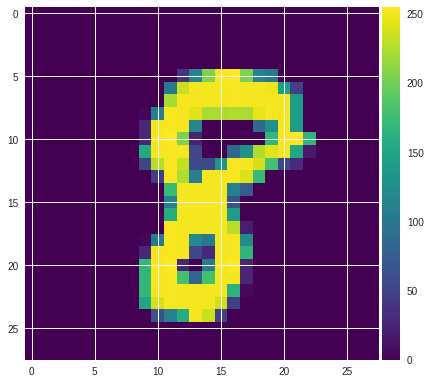

In [34]:
io.imshow(np.reshape(X_train[690],(28,28)))

In [35]:
y_train[690]

8

**Creating a logistic regression model for setting a baseline accuracy. Convolutional NeuralNets have to perform better than this atleast.**

In [0]:
parameters = {'C' : [0.01]}
clf=gsc(LR(),parameters,verbose = 5)

In [11]:
clf.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.8917350946090682, total= 6.5min
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.5min remaining:    0.0s


[CV] ................. C=0.01, score=0.9008928571428572, total= 6.9min
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 13.4min remaining:    0.0s


[CV] ................. C=0.01, score=0.8964808860307253, total= 7.0min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 20.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 20.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={'C': [0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

**Model Trained ... Dumping trained model to a pickle file**

In [0]:
pickle.dump(clf,open("LRModel.p","wb"))

**The Sigmoidal Model accuracy. Looks like i gotta make pretty awesome conv layers to achieve this min accuracy. **

In [14]:
clf.score(X_test,y_test)

0.9048809523809523